**Chargement et Exploration initiale**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("DetectionFraud.csv", sep=None, engine="python")

In [ ]:
print(df.shape)

(585583, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585583 entries, 0 to 585582
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         585583 non-null  int64  
 1   customer     585583 non-null  object 
 2   age          585583 non-null  object 
 3   gender       585582 non-null  object 
 4   zipcodeOri   585582 non-null  object 
 5   merchant     585582 non-null  object 
 6   zipMerchant  585582 non-null  object 
 7   category     585582 non-null  object 
 8   amount       585582 non-null  float64
 9   fraud        585582 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 44.7+ MB


In [ ]:
print(df['category'].value_counts())

category
'es_transportation'        497401
'es_food'                   25729
'es_health'                 15872
'es_wellnessandbeauty'      14902
'es_fashion'                 6361
'es_barsandrestaurants'      6324
'es_hyper'                   6035
'es_sportsandtoys'           3967
'es_tech'                    2340
'es_home'                    1962
'es_hotelservices'           1713
'es_otherservices'            901
'es_contents'                 870
'es_travel'                   720
'es_leisure'                  485
Name: count, dtype: int64


In [ ]:
print(df['fraud'].value_counts())

fraud
0.0    578480
1.0      7102
Name: count, dtype: int64


**Nettoyage des doublons et valeurs manquantes**

In [ ]:
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
print(df['gender'].unique())
print(df['gender'].value_counts())


["'M'" "'F'" "'E'" "'U'"]
gender
'F'    319603
'M'    264311
'E'      1159
'U'       509
Name: count, dtype: int64


nettoyage des valeurs de la colonne de gender avant encodage

In [ ]:
df['gender'] = df['gender'].str.replace("'", "").str.strip()
df['gender'] = df['gender'].apply(lambda x: x if x in ['M','F'] else 'UNKNOWN')

In [ ]:
print(df['gender'].value_counts())

gender
F          319603
M          264311
UNKNOWN      1668
Name: count, dtype: int64


**Nettoyage et encodage de la variable category**

In [ ]:
df['category'] = df['category'].str.replace('"', '').str.replace("'", '').str.strip()

In [ ]:
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [ ]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category mapping:", mapping)
print(df[['category']].head(20))

Category mapping: {'es_barsandrestaurants': np.int64(0), 'es_contents': np.int64(1), 'es_fashion': np.int64(2), 'es_food': np.int64(3), 'es_health': np.int64(4), 'es_home': np.int64(5), 'es_hotelservices': np.int64(6), 'es_hyper': np.int64(7), 'es_leisure': np.int64(8), 'es_otherservices': np.int64(9), 'es_sportsandtoys': np.int64(10), 'es_tech': np.int64(11), 'es_transportation': np.int64(12), 'es_travel': np.int64(13), 'es_wellnessandbeauty': np.int64(14)}
    category
0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12         4
13        12
14        12
15        12
16        12
17        12
18        12
19        12


In [ ]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4',M,'28007','M348934600','28007',12,4.55,0.0
1,0,'C352968107','2',M,'28007','M348934600','28007',12,39.68,0.0
2,0,'C2054744914','4',F,'28007','M1823072687','28007',12,26.89,0.0
3,0,'C1760612790','3',M,'28007','M348934600','28007',12,17.25,0.0
4,0,'C757503768','5',M,'28007','M348934600','28007',12,35.72,0.0
...,...,...,...,...,...,...,...,...,...,...
585577,177,'C1750362802','5',M,'28007','M1823072687','28007',12,11.38,0.0
585578,177,'C956898918','2',F,'28007','M348934600','28007',12,12.93,0.0
585579,177,'C173276320','2',F,'28007','M348934600','28007',12,25.15,0.0
585580,177,'C571527976','4',F,'28007','M85975013','28007',3,30.02,0.0


**Nettoyage et normalisation de la colonne age**

In [ ]:
import pandas as pd
import numpy as np

# Fonction pour nettoyer age
def clean_age(x):
    try:
        # Supprimer quotes si présent
        x = str(x).replace("'", "")
        # Convertir en int
        return int(x)
    except:
        # Si erreur (ex: 'U'), retourner NaN
        return np.nan

# Appliquer la fonction
df['age'] = df['age'].apply(clean_age)

# Remplacer NaN par la médiane
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age).astype(int)

# Vérifier
print(df['age'].unique())
print(df['age'].head())


[4 2 3 5 1 6 0]
0    4
1    2
2    4
3    3
4    5
Name: age, dtype: int64


**standardisation de amount(pour K-Means seulement)**

In [ ]:
# Montant standardisé
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['amount'] = scaler.fit_transform(df[['amount']])


**encodage des variables catégorielles **

In [ ]:
cols_to_encode = ['gender', 'zipcodeOri', 'zipMerchant', 'customer', 'merchant']

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [ ]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4,1,0,30,0,12,-0.298955,0.0
1,0,2753,2,1,0,30,0,12,0.015925,0.0
2,0,2285,4,0,0,18,0,12,-0.098715,0.0
3,0,1650,3,1,0,30,0,12,-0.185121,0.0
4,0,3585,5,1,0,30,0,12,-0.019569,0.0
...,...,...,...,...,...,...,...,...,...,...
585577,177,1634,5,1,0,18,0,12,-0.237736,0.0
585578,177,4018,2,0,0,30,0,12,-0.223843,0.0
585579,177,1597,2,0,0,30,0,12,-0.114311,0.0
585580,177,3191,4,0,0,45,0,3,-0.070660,0.0


# Cluster-based undersampling (équilibrage du dataset)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
# Separate majority class (fraud=0)
X_majority = df[df['fraud'] == 0].drop('fraud', axis=1)

In [ ]:
# Choose number of clusters (number of majority rows you want to keep)
n_clusters = 10_000  # adjust based on memory

**Applique MiniBatchKMeans pour regrouper ces données massives en 10 000 clusters (plus léger que le dataset complet).**

In [ ]:
# MiniBatchKMeans for large datasets
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=20000)
kmeans.fit(X_majority)

MiniBatchKMeans(batch_size=20000, n_clusters=10000, random_state=42)

Sélectionner le point le plus proche du centre de chaque cluster (représentatif).
Conserver ainsi 10 000 exemples non frauduleux au lieu de millions.

In [ ]:
# Keep rows closest to cluster centers
closest_indices = []
for i in range(n_clusters):
    cluster_points = np.where(kmeans.labels_ == i)[0]
    center = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(X_majority.iloc[cluster_points] - center, axis=1)
    closest_idx = cluster_points[np.argmin(distances)]
    closest_indices.append(closest_idx)

In [43]:
# Reduced majority dataset
X_majority_reduced = X_majority.iloc[closest_indices]
y_majority_reduced = pd.Series([0]*len(closest_indices))

In [44]:
print("Original majority size:", X_majority.shape[0])
print("Reduced majority size:", X_majority_reduced.shape[0])

Original majority size: 578480
Reduced majority size: 10000


In [45]:
# Combine the reduced majority with its label
df_majority_reduced = X_majority_reduced.copy()
df_majority_reduced['fraud'] = y_majority_reduced.values

In [46]:
# Concatenate with the minority class (fraud = 1) to get the final dataset
df_minority = df[df['fraud'] == 1]
df_balanced = pd.concat([df_majority_reduced, df_minority], axis=0).reset_index(drop=True)

In [47]:
print("Final dataset shape:", df_balanced.shape)


Final dataset shape: (17102, 10)


In [48]:
# Show first rows
print(df_balanced.head(20))

    step  customer  age  gender  zipcodeOri  merchant  zipMerchant  category  \
0     56       337    1       1           0        45            0         3   
1    134      2849    4       0           0        30            0        12   
2    114      3463    2       1           0        30            0        12   
3    134      3629    2       0           0        18            0        12   
4     83      2212    2       0           0        18            0        12   
5     87       901    3       0           0        18            0        12   
6    146      4024    3       1           0        18            0        12   
7     83      3220    3       0           0        18            0        12   
8     16      1231    5       0           0        30            0        12   
9      3      2487    4       0           0        30            0        12   
10    54      1872    2       0           0        18            0        12   
11   136       681    3       0         

In [49]:
df_balanced

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,56,337,1,1,0,45,0,3,0.177264,0.0
1,134,2849,4,0,0,30,0,12,-0.300837,0.0
2,114,3463,2,1,0,30,0,12,-0.320915,0.0
3,134,3629,2,0,0,18,0,12,-0.276637,0.0
4,83,2212,2,0,0,18,0,12,-0.295101,0.0
...,...,...,...,...,...,...,...,...,...,...
17097,177,2122,3,0,0,49,0,10,0.522889,1.0
17098,177,654,4,1,0,49,0,10,-0.316165,1.0
17099,177,3291,2,0,0,49,0,10,2.635805,1.0
17100,177,3305,2,0,0,34,0,4,0.171617,1.0


**Comparer l’effet de la standardisation sur les analyses.**
df_balanced_std → pour le clustering et analyses de patterns globaux


df_balanced_no_std → pour la compréhension métier (montants réels)

In [50]:
df_balanced_std = df_balanced.copy()  # version avec montant standardisé
df_balanced_no_std = df_balanced.copy()
df_balanced_no_std['amount'] = scaler.inverse_transform(df_balanced_no_std[['amount']])

In [51]:
df_balanced_no_std

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,56,337,1,1,0,45,0,3,57.68,0.0
1,134,2849,4,0,0,30,0,12,4.34,0.0
2,114,3463,2,1,0,30,0,12,2.10,0.0
3,134,3629,2,0,0,18,0,12,7.04,0.0
4,83,2212,2,0,0,18,0,12,4.98,0.0
...,...,...,...,...,...,...,...,...,...,...
17097,177,2122,3,0,0,49,0,10,96.24,1.0
17098,177,654,4,1,0,49,0,10,2.63,1.0
17099,177,3291,2,0,0,49,0,10,331.97,1.0
17100,177,3305,2,0,0,34,0,4,57.05,1.0


# **Analyse descriptive globale**

dimension et types des variables

In [52]:
df_balanced.info()
df_balanced.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17102 entries, 0 to 17101
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         17102 non-null  int64  
 1   customer     17102 non-null  int64  
 2   age          17102 non-null  int64  
 3   gender       17102 non-null  int64  
 4   zipcodeOri   17102 non-null  int64  
 5   merchant     17102 non-null  int64  
 6   zipMerchant  17102 non-null  int64  
 7   category     17102 non-null  int64  
 8   amount       17102 non-null  float64
 9   fraud        17102 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 1.3 MB


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,17102.000000,17102.000000,17102.000000,17102.000000,17102.0,17102.00000,17102.0,17102.000000,17102.000000,17102.000000
mean,90.947959,2067.778798,2.942755,0.405274,0.0,27.65162,0.0,9.550871,1.801452,0.415273
std,50.692648,1170.160717,1.178600,0.495111,0.0,12.48374,0.0,3.648615,5.313666,0.492783
min,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,-0.339738,0.000000
25%,48.000000,1027.000000,2.000000,0.000000,0.0,18.00000,0.0,7.000000,-0.142994,0.000000
50%,92.000000,2110.000000,3.000000,0.000000,0.0,30.00000,0.0,12.000000,0.070691,0.000000
75%,135.000000,3071.750000,4.000000,1.000000,0.0,34.00000,0.0,12.000000,1.970124,1.000000
max,177.000000,4111.000000,6.000000,2.000000,0.0,49.00000,0.0,14.000000,74.324094,1.000000


In [53]:
for col in ['category','gender','zipcodeOri','zipMerchant']:
    print(col, df_balanced[col].nunique(), "valeurs uniques")
    print(df_balanced[col].unique()[:10])  # montre les 10 premières

category 15 valeurs uniques
[ 3 12  0  7  6  4  2 14 10  5]
gender 3 valeurs uniques
[1 0 2]
zipcodeOri 1 valeurs uniques
[0]
zipMerchant 1 valeurs uniques
[0]


**Taux de fraude après équilibrage**

In [54]:
df_balanced['fraud'].value_counts(normalize=True)

,proportion
fraud,
0.0,0.584727
1.0,0.415273


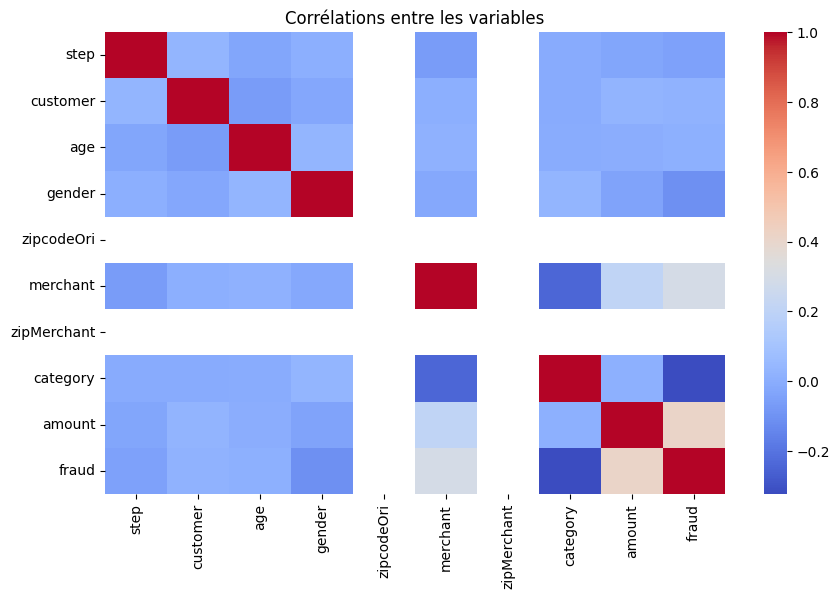

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_balanced.corr(), cmap='coolwarm', annot=False)
plt.title('Corrélations entre les variables')
plt.show()

In [56]:
!pip install mlxtend --quiet

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [57]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**Préparer un sous-ensemble utile du dataset**

In [58]:
cols = ['category', 'gender', 'age', 'amount', 'fraud']
df_patterns = df_balanced_no_std[cols].copy()
df_patterns.head()

,category,gender,age,amount,fraud
0,3,1,1,57.68,0.0
1,12,0,4,4.34,0.0
2,12,1,2,2.10,0.0
3,12,0,2,7.04,0.0
4,12,0,2,4.98,0.0


**Discrétiser les variables continues**

In [59]:
# Discrétisation du montant
df_patterns['amount_bin'] = pd.qcut(
    df_patterns['amount'],
    q=3,
    labels=['Bas', 'Moyen', 'Élevé']
)

# Discrétisation de l’âge (si utile)
df_patterns['age_bin'] = pd.cut(
    df_patterns['age'],
    bins=[0, 25, 40, 60, 100],
    labels=['Jeune', 'Adulte', 'Mature', 'Senior']
)

# Supprimer les anciennes colonnes continues
df_patterns = df_patterns.drop(columns=['amount', 'age'])

df_patterns.head(10)


,category,gender,fraud,amount_bin,age_bin
0,3,1,0.0,Moyen,Jeune
1,12,0,0.0,Bas,Jeune
2,12,1,0.0,Bas,Jeune
3,12,0,0.0,Bas,Jeune
4,12,0,0.0,Bas,Jeune
5,12,0,0.0,Moyen,Jeune
6,12,1,0.0,Bas,Jeune
7,12,0,0.0,Bas,Jeune
8,12,0,0.0,Bas,Jeune
9,12,0,0.0,Moyen,Jeune


**Transformation en format transactionnel**

In [60]:
# Transformer en variables booléennes (one-hot encoding)
df_transactions = pd.get_dummies(df_patterns.astype(str))

print("Taille du dataset transformé :", df_transactions.shape)
df_transactions.head()


Taille du dataset transformé : (17102, 25)


,category_0,category_1,category_10,category_11,category_12,category_13,category_14,category_2,category_3,category_4,...,gender_0,gender_1,gender_2,fraud_0.0,fraud_1.0,amount_bin_Bas,amount_bin_Moyen,amount_bin_Élevé,age_bin_Jeune,age_bin_nan
0,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,True,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False


**Application de l’algorithme Apriori**

In [61]:
# Rechercher les ensembles fréquents (seuil à ajuster selon la taille)
frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True)

# Trier par support décroissant
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.head(10)



,support,itemsets
19,0.996609,(age_bin_Jeune)
12,0.596772,(gender_0)
84,0.594024,"(age_bin_Jeune, gender_0)"
14,0.584727,(fraud_0.0)
93,0.583967,"(age_bin_Jeune, fraud_0.0)"
31,0.484739,"(category_12, fraud_0.0)"
2,0.484739,(category_12)
34,0.484212,"(category_12, age_bin_Jeune)"
125,0.484212,"(category_12, age_bin_Jeune, fraud_0.0)"
15,0.415273,(fraud_1.0)


**Générer les règles d’association**

In [62]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)

rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1870,"(fraud_1.0, amount_bin_Moyen)",(category_14),0.069056,0.042568,0.010817,0.156647,3.679911,1.0,0.007878,1.135268,0.782275,0.107309,0.119151,0.205384
1873,(category_14),"(fraud_1.0, amount_bin_Moyen)",0.042568,0.069056,0.010817,0.254121,3.679911,1.0,0.007878,1.248116,0.760633,0.107309,0.198792,0.205384
1893,"(age_bin_Jeune, category_14)","(fraud_1.0, amount_bin_Moyen)",0.042159,0.069056,0.010701,0.253814,3.675470,1.0,0.007789,1.247603,0.759965,0.106457,0.198463,0.204384
1890,"(fraud_1.0, amount_bin_Moyen)","(age_bin_Jeune, category_14)",0.069056,0.042159,0.010701,0.154953,3.675470,1.0,0.007789,1.133477,0.781923,0.106457,0.117759,0.204384
1888,"(fraud_1.0, age_bin_Jeune, amount_bin_Moyen)",(category_14),0.068822,0.042568,0.010701,0.155480,3.652499,1.0,0.007771,1.133700,0.779889,0.106272,0.117932,0.203427
1895,(category_14),"(fraud_1.0, age_bin_Jeune, amount_bin_Moyen)",0.042568,0.068822,0.010701,0.251374,3.652499,1.0,0.007771,1.243848,0.758503,0.106272,0.196043,0.203427
1407,"(fraud_1.0, amount_bin_Élevé)","(category_8, age_bin_Jeune, gender_0)",0.327038,0.017366,0.017074,0.052208,3.006273,1.0,0.011395,1.036761,0.991679,0.052161,0.035457,0.517687
1388,"(category_8, age_bin_Jeune, gender_0)","(fraud_1.0, amount_bin_Élevé)",0.017366,0.327038,0.017074,0.983165,3.006273,1.0,0.011395,39.973956,0.679157,0.052161,0.974984,0.517687
1815,(category_13),"(gender_1, fraud_1.0, amount_bin_Élevé)",0.033329,0.112209,0.011227,0.336842,3.001914,1.0,0.007487,1.338732,0.689872,0.083587,0.253025,0.218447
1808,"(gender_1, fraud_1.0, amount_bin_Élevé)",(category_13),0.112209,0.033329,0.011227,0.100052,3.001914,1.0,0.007487,1.074141,0.751167,0.083587,0.069023,0.218447


In [63]:
rules_fraud = rules[rules['consequents'].astype(str).str.contains('fraud_1')]
rules_fraud = rules_fraud[
    (rules_fraud['confidence'] > 0.6) &
    (rules_fraud['lift'] > 2)
]
rules_fraud.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1388,"(category_8, age_bin_Jeune, gender_0)","(fraud_1.0, amount_bin_Élevé)",0.017366,0.327038,0.017074,0.983165,3.006273,1.0,0.011395,39.973956,0.679157,0.052161,0.974984,0.517687
1172,"(category_13, gender_0)","(fraud_1.0, amount_bin_Élevé)",0.021752,0.327038,0.021343,0.981183,3.000212,1.0,0.014229,35.763135,0.681514,0.065179,0.972038,0.523221
1210,"(category_13, age_bin_Jeune, gender_0)","(fraud_1.0, amount_bin_Élevé)",0.021576,0.327038,0.021167,0.981030,2.999745,1.0,0.014111,35.474723,0.681339,0.064643,0.971811,0.522877
1224,"(category_13, gender_0)","(age_bin_Jeune, fraud_1.0, amount_bin_Élevé)",0.021752,0.324640,0.021167,0.973118,2.997527,1.0,0.014106,25.123377,0.681209,0.065085,0.960196,0.519160
1368,"(category_8, gender_0)","(fraud_1.0, amount_bin_Élevé)",0.017600,0.327038,0.017249,0.980066,2.996799,1.0,0.011493,33.760272,0.678248,0.052688,0.970379,0.516405
1049,"(category_8, age_bin_Jeune)","(fraud_1.0, amount_bin_Élevé)",0.026664,0.327038,0.026079,0.978070,2.990695,1.0,0.017359,30.687078,0.683864,0.079600,0.967413,0.528906
1230,(category_13),"(age_bin_Jeune, gender_0, fraud_1.0, amount_bi...",0.033329,0.212490,0.021167,0.635088,2.988792,1.0,0.014085,2.158081,0.688359,0.094222,0.536625,0.367351
1399,"(category_8, gender_0)","(age_bin_Jeune, fraud_1.0, amount_bin_Élevé)",0.017600,0.324640,0.017074,0.970100,2.988228,1.0,0.011360,22.587027,0.677274,0.052509,0.955727,0.511347
1220,"(category_13, age_bin_Jeune)","(gender_0, fraud_1.0, amount_bin_Élevé)",0.033037,0.214419,0.021167,0.640708,2.988107,1.0,0.014083,2.186468,0.688072,0.093540,0.542641,0.369713
809,(category_13),"(fraud_1.0, amount_bin_Élevé)",0.033329,0.327038,0.032569,0.977193,2.988013,1.0,0.021669,29.506805,0.688269,0.099358,0.966110,0.538391


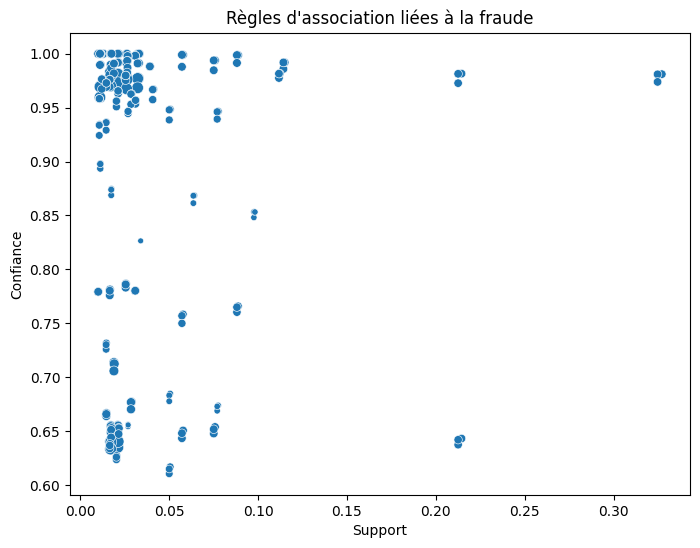

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules_fraud, legend=False)
plt.title("Règles d'association liées à la fraude")
plt.xlabel("Support")
plt.ylabel("Confiance")
plt.show()


In [65]:
!pip install xgboost --quiet


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import matplotlib.pyplot as plt

In [67]:
features = ['step', 'customer', 'age', 'gender', 'zipcodeOri',
            'merchant', 'zipMerchant', 'category', 'amount']
target = 'fraud'

X = df_balanced_no_std[features]
y = df_balanced_no_std[target]

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (17102, 9)
Shape y: (17102,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (13681, 9)
Test size: (3421, 9)


In [69]:
# Pour gérer le déséquilibre
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

print("Modèle XGBoost créé avec scale_pos_weight =", scale_pos_weight)

Modèle XGBoost créé avec scale_pos_weight = 1.408202781200493


In [70]:
xgb_model.fit(X_train, y_train)
print("Modèle entraîné.")

Modèle entraîné.


In [71]:
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]

print("Prédictions réalisées.")

Prédictions réalisées.


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2000
         1.0       0.98      0.99      0.98      1421

    accuracy                           0.98      3421
   macro avg       0.98      0.98      0.98      3421
weighted avg       0.98      0.98      0.98      3421

ROC AUC: 0.9988983110485574


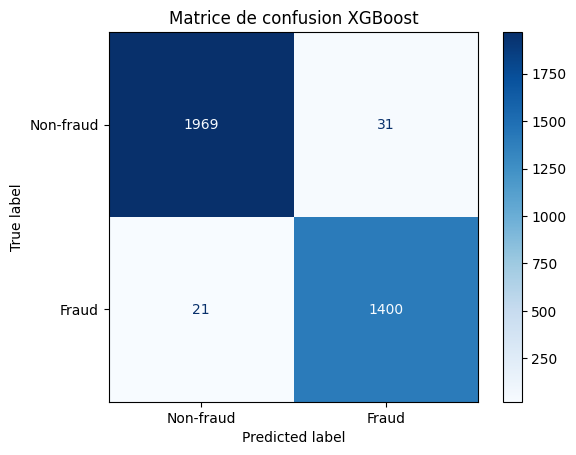

In [72]:
# Classification report
print(classification_report(y_test, y_pred))

# ROC AUC
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matrice de confusion XGBoost")
plt.show()

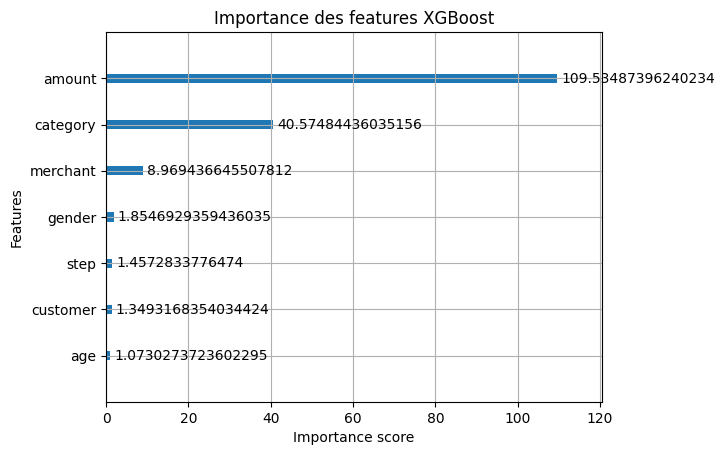

In [73]:
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Importance des features XGBoost")
plt.show()